In [1]:
import tensorflow as tf
import os
import numpy as np
import  matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
class AlexNet8(keras.Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        self.c1 = keras.layers.Conv2D(filters=96, kernel_size=(3, 3))
        self.b1 = keras.layers.BatchNormalization()
        self.a1 = keras.layers.Activation('relu')
        self.p1 = keras.layers.MaxPool2D(pool_size=(3, 3), strides=2)
        
        self.c2 = keras.layers.Conv2D(filters=256, kernel_size=(3, 3))
        self.b2 = keras.layers.BatchNormalization()
        self.a2 = keras.layers.Activation('relu')
        self.p2 = keras.layers.MaxPool2D(pool_size=(3, 3), strides=2)
        
        self.c3 = keras.layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu')
        self.c4 = keras.layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu')
        self.c5 = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')
        self.p3 = keras.layers.MaxPool2D(pool_size=(3, 3), strides=2)
        
        self.flatten = keras.layers.Flatten()
        self.fc1 = keras.layers.Dense(2048, activation='relu')
        self.dr1 = keras.layers.Dropout(0.5)
        self.fc2 = keras.layers.Dense(2048, activation='relu')
        self.dr2 = keras.layers.Dropout(0.5)
        self.fc3 = keras.layers.Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)
        
        x = self.c3(x)
        x = self.c4(x)
        x = self.c5(x)
        x = self.p3(x)
        
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dr1(x)
        x = self.fc2(x)
        x = self.dr2(x)
        y = self.fc3(x)
        return y 

In [4]:
model = AlexNet8()
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])


In [8]:
history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test), validation_freq=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 279s 6ms/sample - loss: 1.6082 - sparse_categorical_accuracy: 0.4087 - val_loss: 1.6070 - val_sparse_categorical_accuracy: 0.4266
Epoch 2/15
50000/50000 [==============================] - 278s 6ms/sample - loss: 1.3037 - sparse_categorical_accuracy: 0.5403 - val_loss: 1.4063 - val_sparse_categorical_accuracy: 0.5080
Epoch 3/15
50000/50000 [==============================] - 276s 6ms/sample - loss: 1.1700 - sparse_categorical_accuracy: 0.5923 - val_loss: 1.4855 - val_sparse_categorical_accuracy: 0.4977
Epoch 4/15
50000/50000 [==============================] - 277s 6ms/sample - loss: 1.0885 - sparse_categorical_accuracy: 0.6247 - val_loss: 1.0536 - val_sparse_categorical_accuracy: 0.6356
Epoch 5/15
50000/50000 [==============================] - 282s 6ms/sample - loss: 1.0148 - sparse_categorical_accuracy: 0.6508 - val_loss: 1.3867 - val_sparse_categorical_accuracy: 0.5365
Epoch 6/15

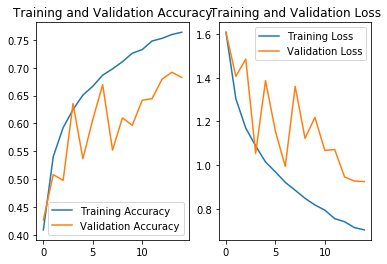

In [9]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()